In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel("terr_data.xlsm")

In [3]:
data.head()

,iyear,imonth,iday,country_txt,city,attacktype1_txt,targtype1_txt,corp1,target1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill,nwound,propextent_txt,ransomamt
0,2012,1,1,Kenya,Garissa,Armed Assault,Business,Locus Pub,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,Two grenades and AK-47 assault rifles were use...,3.0,14.0,Minor (likely < $1 million),NaN
1,2012,1,1,Pakistan,Sui,Bombing/Explosion,Military,Frontier Corps (FC),Soldiers,Pakistan,Baloch Republican Army (BRA),Explosives/Bombs/Dynamite,Land Mine,NaN,4.0,3.0,Minor (likely < $1 million),NaN
2,2012,1,1,Kenya,Garissa,Armed Assault,Business,Unknown,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,NaN,2.0,14.0,Minor (likely < $1 million),NaN
3,2012,1,1,Afghanistan,Karez,Bombing/Explosion,Military,North Atlantic Treaty Organization (NATO): Int...,Vehicle,International,Taliban,Explosives/Bombs/Dynamite,Unknown Explosive Type,NaN,0.0,0.0,Unknown,NaN
4,2012,1,1,Democratic Republic of the Congo,Shabunda,Facility/Infrastructure Attack,Private Citizens & Property,Not Applicable,Civilians,Democratic Republic of the Congo,Democratic Front for the Liberation of Rwanda ...,Incendiary,Arson/Fire,NaN,18.0,5.0,Minor (likely < $1 million),NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43915 entries, 0 to 43914
Data columns (total 18 columns):
iyear               43915 non-null int64
imonth              43915 non-null int64
iday                43915 non-null int64
country_txt         43915 non-null object
city                43915 non-null object
attacktype1_txt     43915 non-null object
targtype1_txt       43915 non-null object
corp1               43915 non-null object
target1             43915 non-null object
natlty1_txt         43342 non-null object
gname               43915 non-null object
weaptype1_txt       43915 non-null object
weapsubtype1_txt    39346 non-null object
weapdetail          16985 non-null object
nkill               41290 non-null float64
nwound              39313 non-null float64
propextent_txt      15615 non-null object
ransomamt           273 non-null float64
dtypes: float64(3), int64(3), object(12)
memory usage: 6.0+ MB


In [5]:
data['ransomamt'].count()

273

In [6]:
df=data.copy()

In [7]:
df=df.drop('ransomamt',axis=1)

In [8]:
df.describe()

,iyear,imonth,iday,nkill,nwound
count,43915.000000,43915.000000,43915.000000,41290.000000,39313.000000
mean,2014.688079,6.442537,15.664716,3.110463,3.504006
std,1.229350,3.390650,8.778536,13.343306,13.988988
min,2012.000000,1.000000,1.000000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,0.000000,0.000000
50%,2015.000000,6.000000,15.000000,1.000000,0.000000
75%,2016.000000,9.000000,23.000000,2.000000,3.000000
max,2016.000000,12.000000,31.000000,1500.000000,1500.000000


In [9]:
df.corr()

,iyear,imonth,iday,nkill,nwound
iyear,1.000000,-0.032845,-0.002996,-0.019340,-0.025865
imonth,-0.032845,1.000000,0.002112,0.005468,-0.001070
iday,-0.002996,0.002112,1.000000,-0.008516,-0.001725
nkill,-0.019340,0.005468,-0.008516,1.000000,0.364357
nwound,-0.025865,-0.001070,-0.001725,0.364357,1.000000


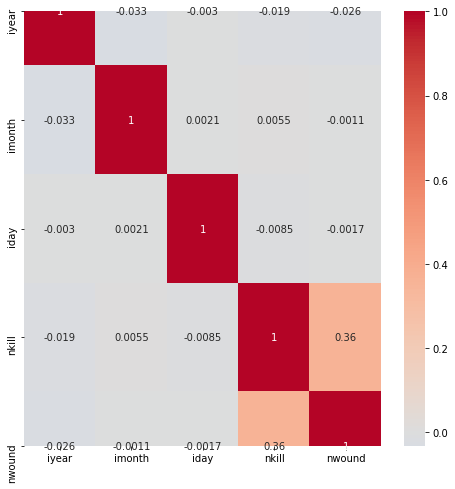

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',center=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43915 entries, 0 to 43914
Data columns (total 17 columns):
iyear               43915 non-null int64
imonth              43915 non-null int64
iday                43915 non-null int64
country_txt         43915 non-null object
city                43915 non-null object
attacktype1_txt     43915 non-null object
targtype1_txt       43915 non-null object
corp1               43915 non-null object
target1             43915 non-null object
natlty1_txt         43342 non-null object
gname               43915 non-null object
weaptype1_txt       43915 non-null object
weapsubtype1_txt    39346 non-null object
weapdetail          16985 non-null object
nkill               41290 non-null float64
nwound              39313 non-null float64
propextent_txt      15615 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 5.7+ MB


In [12]:
df['gname'].value_counts()

Unknown                                                              12210
Taliban                                                               4900
Islamic State of Iraq and the Levant (ISIL)                           4273
Al-Shabaab                                                            2350
Boko Haram                                                            1921
                                                                     ...  
Orakzai Freedom Movement                                                 1
Revolutionary Communist Centre (RCC)                                     1
Jharkhand Liberation Tigers (JLT)                                        1
Kurdish Militants                                                        1
Jumuiya ya Taasisi za Kiislam (Community of Muslim Organizations)        1
Name: gname, Length: 769, dtype: int64

In [13]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
city                    0
attacktype1_txt         0
targtype1_txt           0
corp1                   0
target1                 0
natlty1_txt           573
gname                   0
weaptype1_txt           0
weapsubtype1_txt     4569
weapdetail          26930
nkill                2625
nwound               4602
propextent_txt      28300
dtype: int64

In [14]:
len(df['gname'].unique())

769

xticklabels=sets the string for x axis
.index=returns with  the index of 

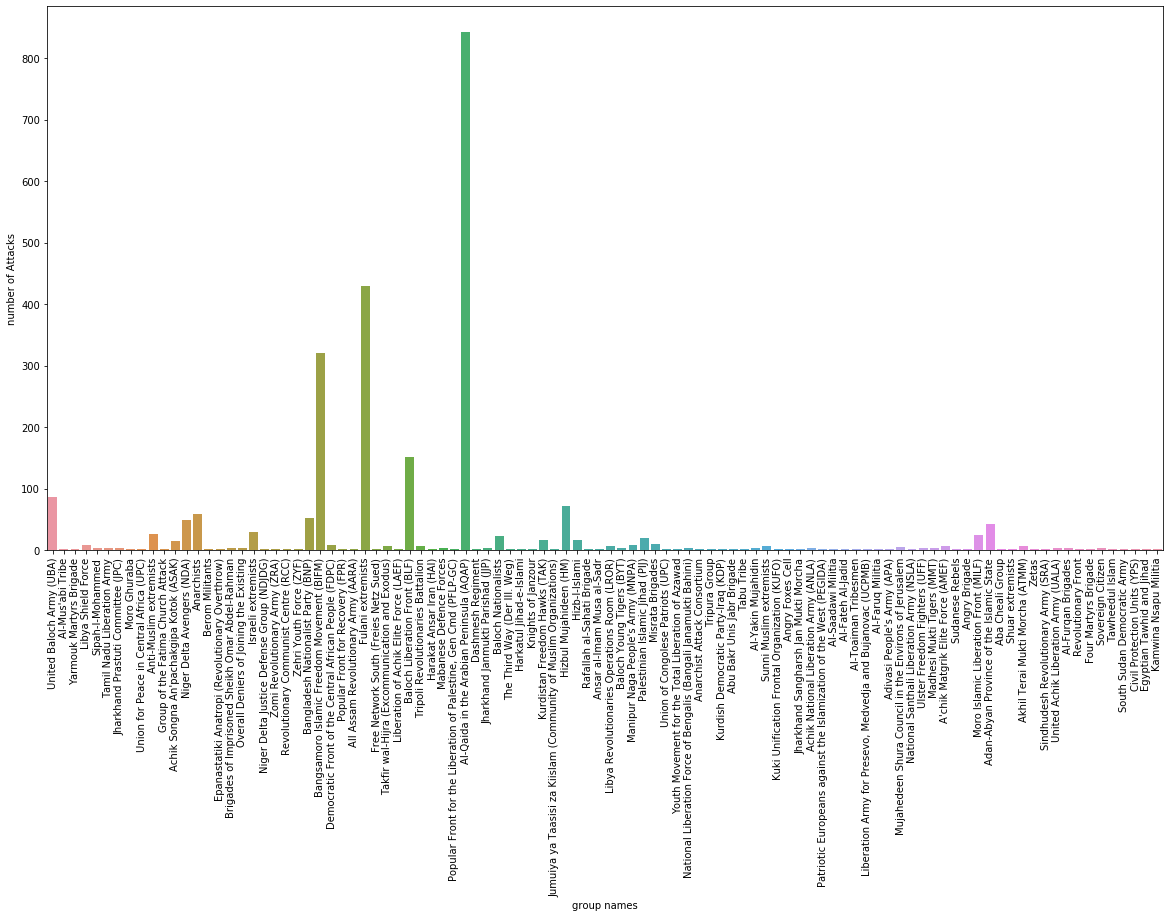

In [15]:
plt.subplots(figsize=(20,10))
no_of_classes=df['gname'].value_counts(sort=True)
no_of_classes_sample=no_of_classes.sample(n=100)
p=sns.barplot(no_of_classes_sample.index,no_of_classes_sample)
p.set(xlabel="group names",ylabel="number of Attacks")
p.set_xticklabels(no_of_classes_sample.index,rotation=90)
plt.show()

In [16]:
df.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
city                    0
attacktype1_txt         0
targtype1_txt           0
corp1                   0
target1                 0
natlty1_txt           573
gname                   0
weaptype1_txt           0
weapsubtype1_txt     4569
weapdetail          26930
nkill                2625
nwound               4602
propextent_txt      28300
dtype: int64

In [17]:
attributes=["country_txt","attacktype1_txt","targtype1_txt","target1","weaptype1_txt","nkill","iyear","city","corp1"]
data_kill=pd.DataFrame(df[attributes])

In [18]:
data_kill.head()

,country_txt,attacktype1_txt,targtype1_txt,target1,weaptype1_txt,nkill,iyear,city,corp1
0,Kenya,Armed Assault,Business,Bar,Explosives/Bombs/Dynamite,3.0,2012,Garissa,Locus Pub
1,Pakistan,Bombing/Explosion,Military,Soldiers,Explosives/Bombs/Dynamite,4.0,2012,Sui,Frontier Corps (FC)
2,Kenya,Armed Assault,Business,Bar,Explosives/Bombs/Dynamite,2.0,2012,Garissa,Unknown
3,Afghanistan,Bombing/Explosion,Military,Vehicle,Explosives/Bombs/Dynamite,0.0,2012,Karez,North Atlantic Treaty Organization (NATO): Int...
4,Democratic Republic of the Congo,Facility/Infrastructure Attack,Private Citizens & Property,Civilians,Incendiary,18.0,2012,Shabunda,Not Applicable


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [20]:
data_kill['country_txt']=encoder.fit_transform(data_kill['country_txt'])


In [21]:
data_kill.head()

,country_txt,attacktype1_txt,targtype1_txt,target1,weaptype1_txt,nkill,iyear,city,corp1
0,56,Armed Assault,Business,Bar,Explosives/Bombs/Dynamite,3.0,2012,Garissa,Locus Pub
1,82,Bombing/Explosion,Military,Soldiers,Explosives/Bombs/Dynamite,4.0,2012,Sui,Frontier Corps (FC)
2,56,Armed Assault,Business,Bar,Explosives/Bombs/Dynamite,2.0,2012,Garissa,Unknown
3,0,Bombing/Explosion,Military,Vehicle,Explosives/Bombs/Dynamite,0.0,2012,Karez,North Atlantic Treaty Organization (NATO): Int...
4,27,Facility/Infrastructure Attack,Private Citizens & Property,Civilians,Incendiary,18.0,2012,Shabunda,Not Applicable


In [22]:
data_kill['attacktype1_txt']=encoder.fit_transform(data_kill['attacktype1_txt'])
data_kill['targtype1_txt']=encoder.fit_transform(data_kill['targtype1_txt'])
data_kill['target1']=encoder.fit_transform(data_kill['target1'])
data_kill['weaptype1_txt']=encoder.fit_transform(data_kill['weaptype1_txt'])
data_kill['city']=encoder.fit_transform(data_kill['city'])
data_kill['corp1']=encoder.fit_transform(data_kill['corp1'])


In [23]:
data_kill.head()

,country_txt,attacktype1_txt,targtype1_txt,target1,weaptype1_txt,nkill,iyear,city,corp1
0,56,0,2,1084,2,3.0,2012,4206,4764
1,82,2,9,9799,2,4.0,2012,11535,2201
2,56,0,2,1084,2,2.0,2012,4206,7297
3,0,2,9,10957,2,0.0,2012,5999,5528
4,27,3,13,2402,5,18.0,2012,10956,5547


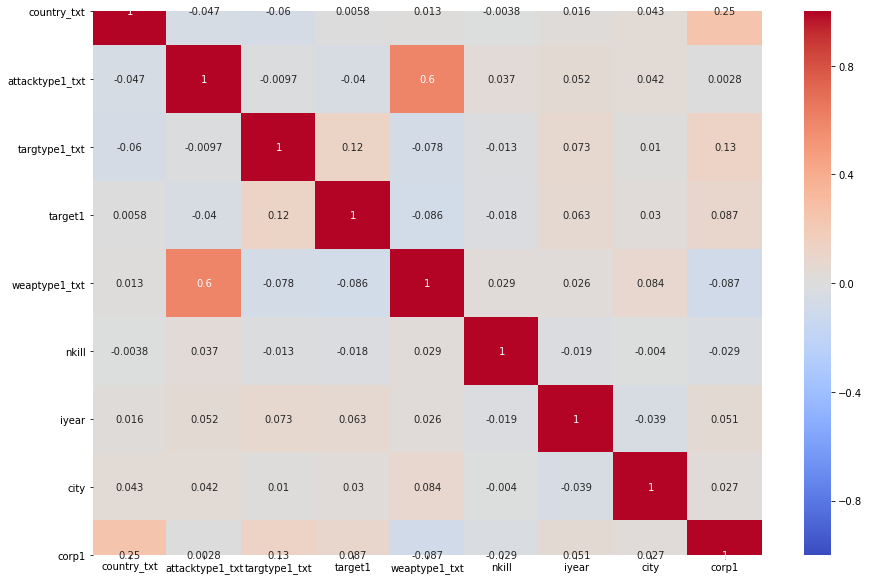

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data_kill.corr(),annot=True,cmap='coolwarm',center=0,vmin=-1.0)

In [25]:
data_kill=data_kill.dropna()
cross_matrix=data_kill.corr()
print(cross_matrix)

                 country_txt  attacktype1_txt  targtype1_txt   target1  \
country_txt         1.000000        -0.062649      -0.059137  0.009220   
attacktype1_txt    -0.062649         1.000000      -0.006924 -0.026701   
targtype1_txt      -0.059137        -0.006924       1.000000  0.126030   
target1             0.009220        -0.026701       0.126030  1.000000   
weaptype1_txt       0.004817         0.559812      -0.084561 -0.075973   
nkill              -0.003809         0.036643      -0.012600 -0.017570   
iyear               0.021081         0.046464       0.070588  0.067898   
city                0.042525         0.032013       0.012362  0.032066   
corp1               0.263829        -0.000688       0.128626  0.089690   

                 weaptype1_txt     nkill     iyear      city     corp1  
country_txt           0.004817 -0.003809  0.021081  0.042525  0.263829  
attacktype1_txt       0.559812  0.036643  0.046464  0.032013 -0.000688  
targtype1_txt        -0.084561 -0.012600

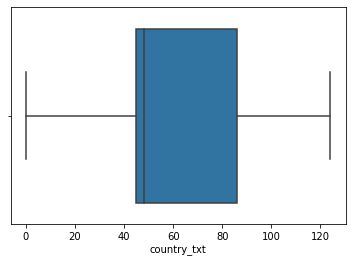

In [26]:
sns.boxplot(x=data_kill['country_txt'])

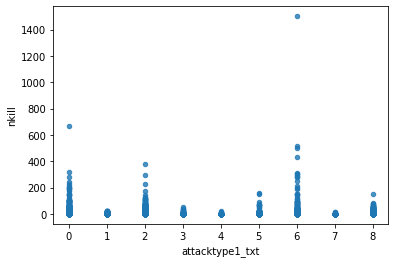

In [27]:

data_kill.plot(kind="scatter",x='attacktype1_txt',y='nkill',alpha=0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017606432888>,
      dtype=object)

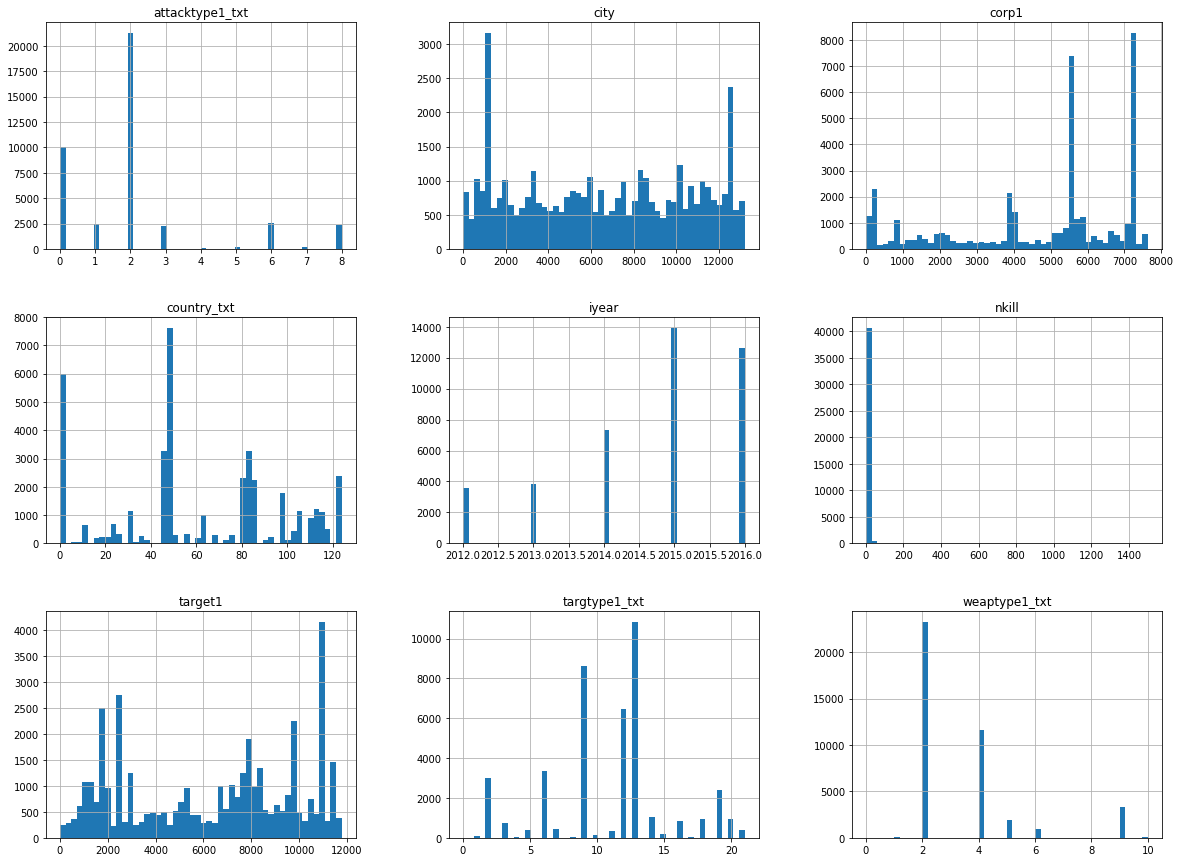

In [28]:
data_kill.hist(bins=50,figsize=(20,15))

In [29]:
data_kill.head()

,country_txt,attacktype1_txt,targtype1_txt,target1,weaptype1_txt,nkill,iyear,city,corp1
0,56,0,2,1084,2,3.0,2012,4206,4764
1,82,2,9,9799,2,4.0,2012,11535,2201
2,56,0,2,1084,2,2.0,2012,4206,7297
3,0,2,9,10957,2,0.0,2012,5999,5528
4,27,3,13,2402,5,18.0,2012,10956,5547


In [30]:
##from pandas.plotting import scatter_matrix
###attributes=["country_txt","attacktype1_txt","targtype1_txt","target1","iyear"]
###scatter_matrix(data_kill[attributes],figsize=(15,15))

In [31]:
temp_data=data_kill['city'].value_counts(sort=True)

In [32]:
data_kill['city'].head()

0     4206
1    11535
2     4206
3     5999
4    10956
Name: city, dtype: int32

In [33]:
temp_data.head()

1253     2398
12514    1928
8390      627
5961      375
8483      314
Name: city, dtype: int64

In [34]:
temp_data[500]

1

In [35]:
temp1=temp_data[0:500]

In [36]:
temp1.head()

1253     2398
12514    1928
8390      627
5961      375
8483      314
Name: city, dtype: int64